In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def array_to_concatenated_string(array):
    return ",".join(str(x) for x in array)


def concatenated_string_to_array(string):
    return np.array([int(x) for x in string.split(",")])


def parse_input(giant_string):
    X_train_part, Y_train_part, X_test_part = giant_string.split("XXX")

    X_train_row_strings = X_train_part.split("S")
    X_train_rows = [[float(x) for x in row.split(",")] for row in X_train_row_strings]
    X_train = np.array(X_train_rows)

    Y_train = concatenated_string_to_array(Y_train_part)

    X_test_row_strings = X_test_part.split("S")
    X_test_rows = [[float(x) for x in row.split(",")] for row in X_test_row_strings]
    X_test = np.array(X_test_rows)

    return X_train, Y_train, X_test


In [89]:
def data_normalization(data, params = None):
    const = 1.1
    if params is None:
        params = np.zeros([2, 3], dtype = np.float64)
        params[0] = X_train.min(0) * const
        params[1] = X_train.max(0) * const
    
    return ((data - params[0]) / (params[1] - params[0])  - 0.5) * np.pi, params
      

In [70]:
def data_normalization_new(data, params = None):
    norm = np.sum(data**2, -1)
    return (data.T / norm).T, None
      

In [90]:
file = open("./1.in","r")
data = file.read()
file.close()
X_train, Y_train, X_test = parse_input(data)

In [13]:
val = 0
xs = X_train[Y_train == -1][:,val]
ys = X_train[Y_train == -1][:,val]
zs = X_train[Y_train == -1][:,val]


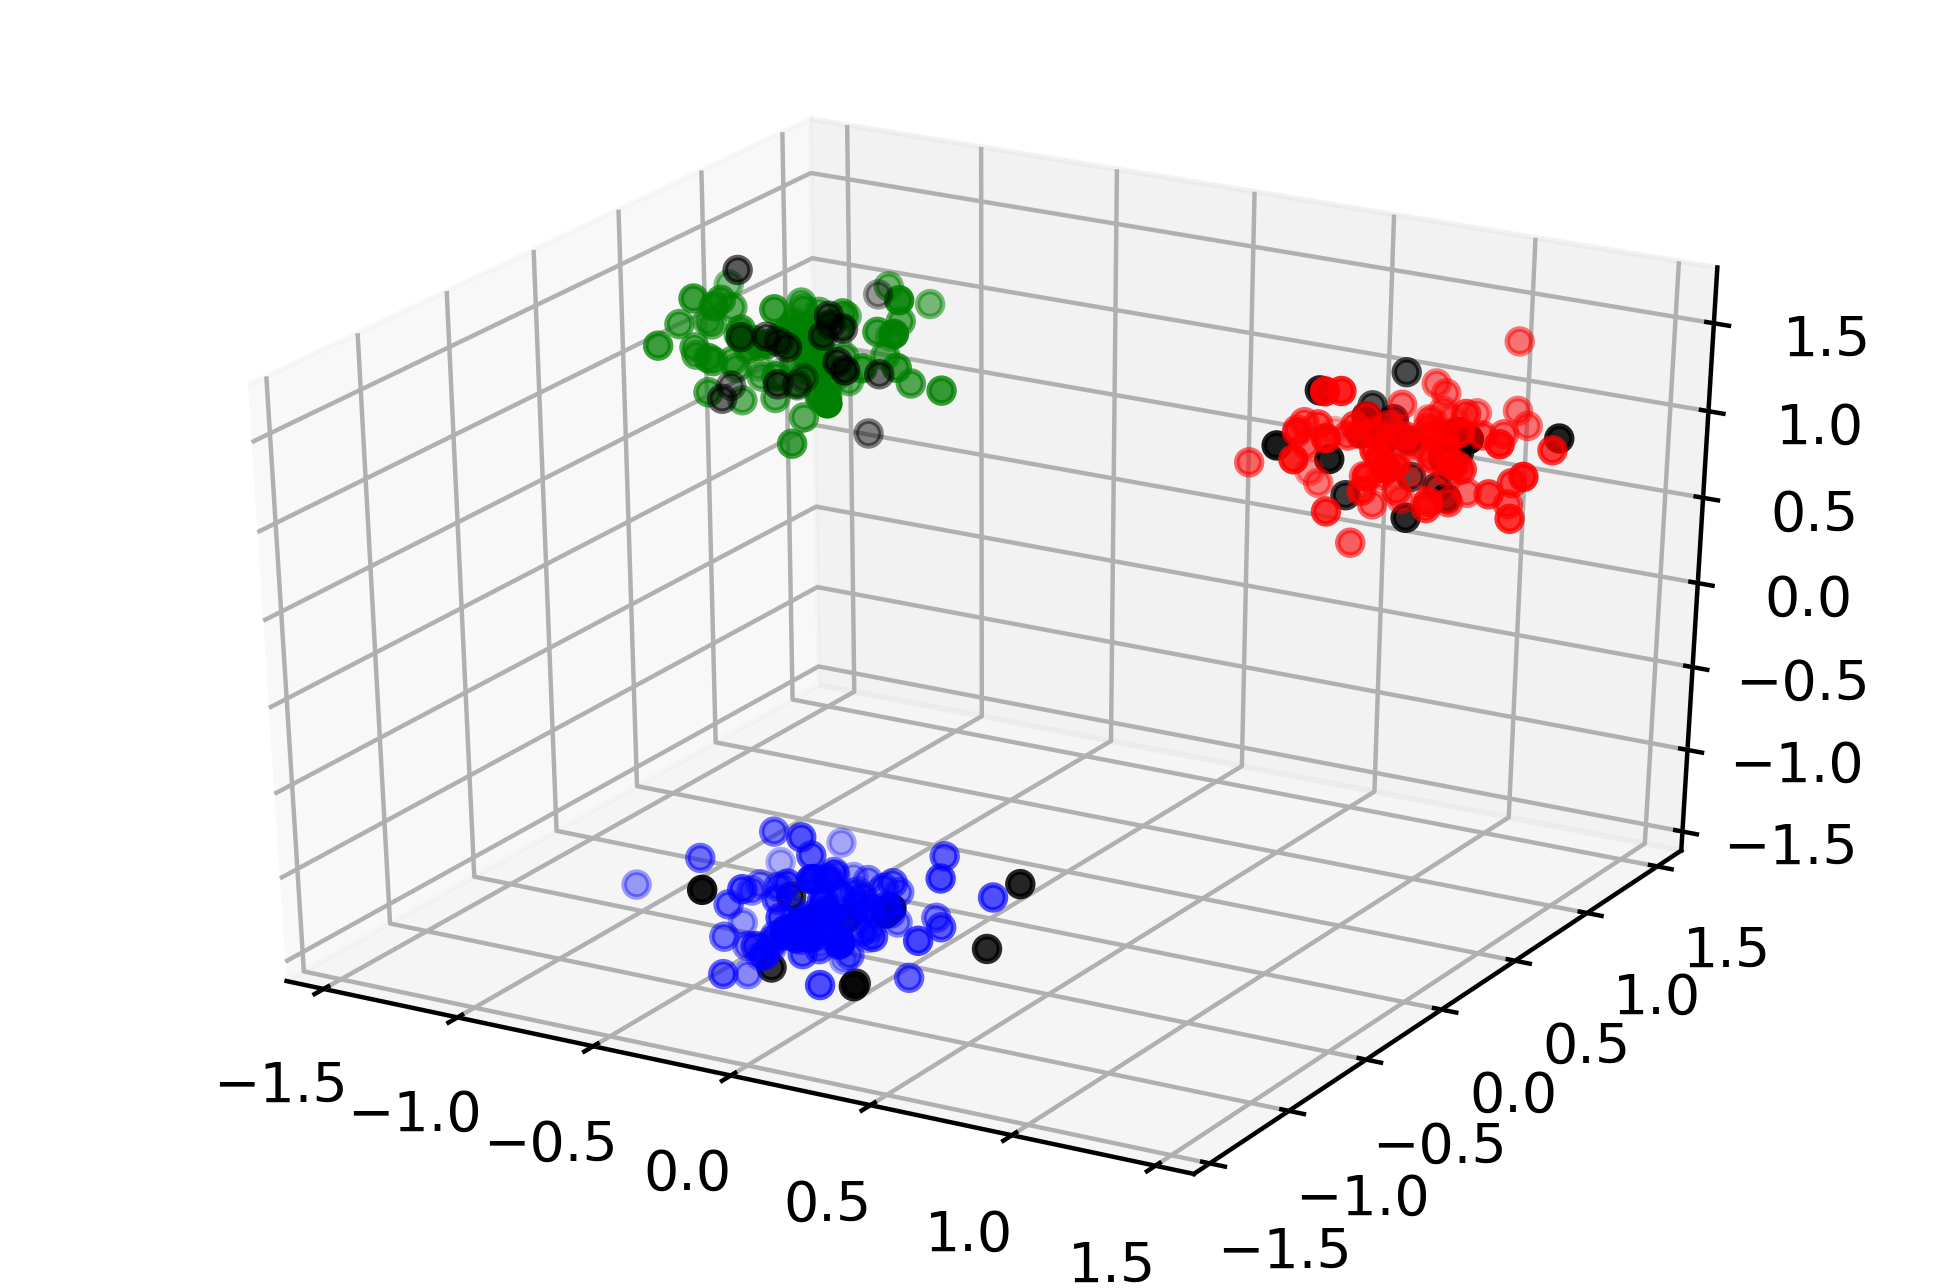

In [91]:
X_train, norm_param = data_normalization(X_train)
X_test = data_normalization(X_test, params = norm_param)[0]
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, projection='3d')
for val, m in [[-1, "red"],[0, "green"],[1, "blue"]]:
    xs = X_train[Y_train == val][:,0]
    ys = X_train[Y_train == val][:,1]
    zs = X_train[Y_train == val][:,2]
    ax.scatter(xs, ys, zs, color = m)

xs = X_test[:,0]
ys = X_test[:,1]
zs = X_test[:,2]
ax.scatter(xs, ys, zs, color = 'black')

In [72]:
import numpy as np
import math as m
  
def Rx(theta):
    return np.matrix([[ 1, 0           , 0           ],
                   [ 0, np.cos(theta),-np.sin(theta)],
                   [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
    return np.matrix([[ np.cos(theta), 0, np.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-np.sin(theta), 0, np.cos(theta)]])
  
def Rz(theta):
    return np.matrix([[ np.cos(theta), -np.sin(theta), 0 ],
                   [ np.sin(theta), np.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])


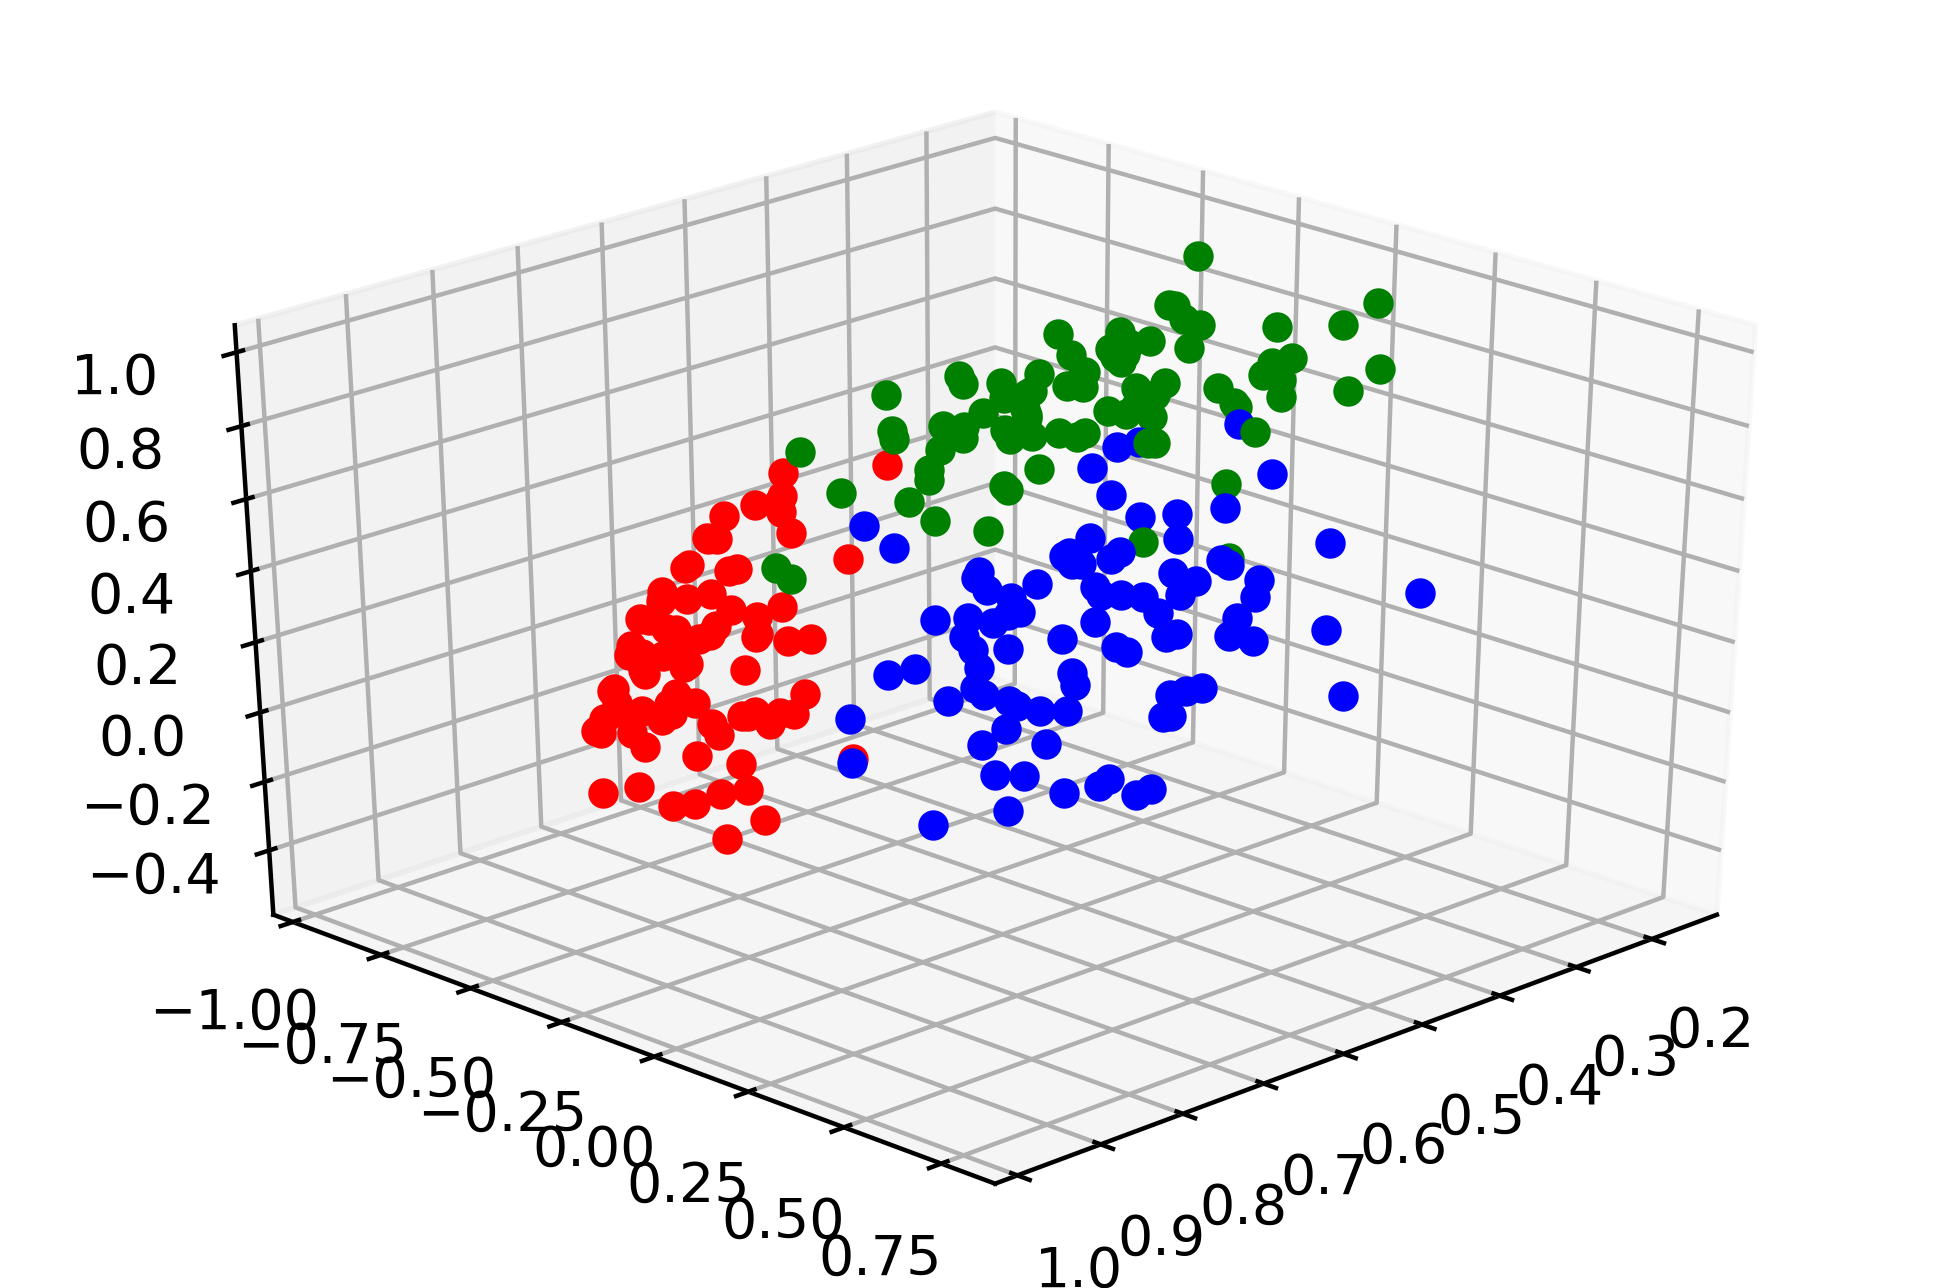

In [92]:
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 45)
for val, m in [[-1, "red"],[0, "green"],[1, "blue"]]:
    for angles in X_train[Y_train == val]:
        xs, ys, zs = Rx(angles[0]) @ Rz(angles[1]) @ Rx(angles[2]) @ np.array([[0],[0],[1]])
        ax.scatter(xs, ys, zs, color = m)
        
xs = X_test[:,0]
ys = X_test[:,1]
zs = X_test[:,2]
#ax.scatter(xs, ys, zs, color = 'black')


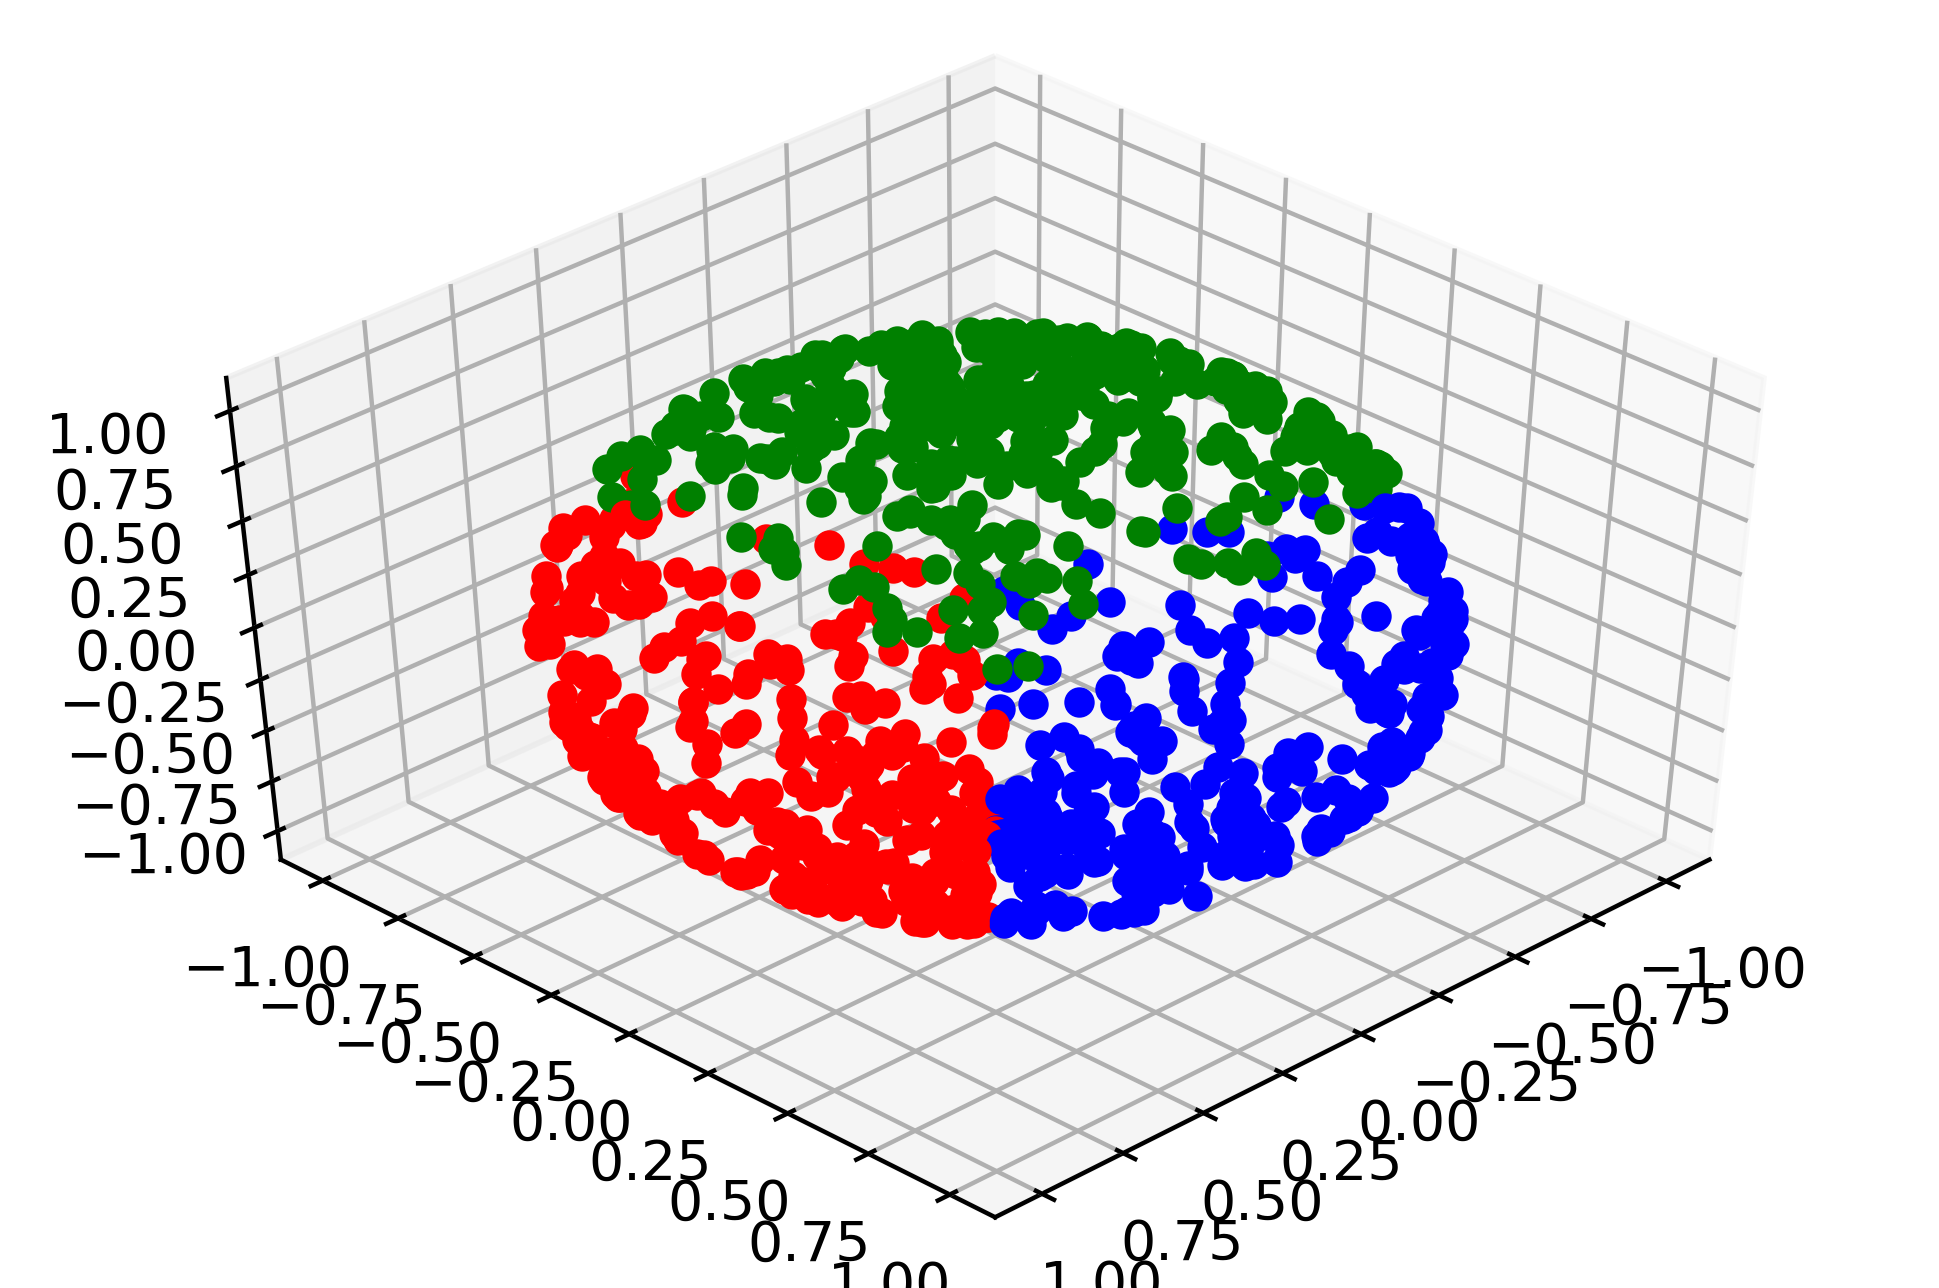

In [108]:
N = 1000
fig = plt.figure(dpi = 400)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(45, 45)
phi = np.random.rand(N) * np.pi * 2  # +1 ) * pi
omega = (np.random.rand(N) - 0.5) * np.pi # * pi /2
x = np.cos(omega) * np.sin(phi)
y = np.cos(omega) * np.cos(phi)
z = np.sin(omega)
f1 = np.exp(x) / (np.exp(x) + np.exp(y) + np.exp(z))
f2 = np.exp(y) / (np.exp(x) + np.exp(y) + np.exp(z))
f3 = np.exp(z) / (np.exp(x) + np.exp(y) + np.exp(z))
for i in range(N):
    ax.scatter(x[i], y[i], z[i], 
               color = ["red", "blue", "green"][np.argmax([f1[i], 
                                       f2[i], 
                                       f3[i]])])

y_vec = [int(y==val) for val in [-1, 0, 1]] 

    
for i in range(3):
    for j in range(3)
        y_vec[j] * np.log(f[i])

In [132]:

def cost_f(exp_values, f):
    phi = (exp_values[0] +1 ) * np.pi
    omega = exp_values[1] * np.pi /2
    x = np.cos(omega) * np.sin(phi)
    y = np.cos(omega) * np.cos(phi)
    z = np.sin(omega)
    y1 = np.exp(x) / (np.exp(x) + np.exp(y) + np.exp(z))
    y2 = np.exp(y) / (np.exp(x) + np.exp(y) + np.exp(z))
    y3 = np.exp(z) / (np.exp(x) + np.exp(y) + np.exp(z))

    f_vec = np.array([int(f==val) for val in [-1, 0, 1]])
    return -np.sum(f_vec * np.log([y1, y2, y3]))

In [143]:
X_train[0]

array([0.89070566, 1.24990897, 1.15619551])